In [12]:
import os

In [13]:
for dirpath, dirnames, filenames in os.walk("data/shoe_classification/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in data/shoe_classification/
There are 3 directories and 0 images in data/shoe_classification/test
There are 0 directories and 38 images in data/shoe_classification/test\adidas
There are 0 directories and 38 images in data/shoe_classification/test\converse
There are 0 directories and 38 images in data/shoe_classification/test\nike
There are 3 directories and 0 images in data/shoe_classification/train
There are 0 directories and 237 images in data/shoe_classification/train\adidas
There are 0 directories and 237 images in data/shoe_classification/train\converse
There are 0 directories and 237 images in data/shoe_classification/train\nike


In [14]:
num_nike_train_img = len(os.listdir("data/shoe_classification/train/nike/"))
num_nike_train_img

237

In [15]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt

In [16]:
data_dir = pathlib.Path("data/shoe_classification/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['adidas', 'converse', 'nike'], dtype='<U8')

In [17]:
import matplotlib.image as mimage

In [7]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mimage.imread(target_folder+ "\\" +random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    
    print(f"Image shape: {img.shape}")
    
    return img

Image shape: (240, 240, 3)


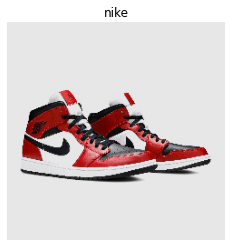

In [8]:
view_random_image(target_dir='data/shoe_classification/train/', target_class='nike');

In [9]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Image shape: (240, 240, 3)
Image shape: (240, 240, 3)
Image shape: (240, 240, 3)


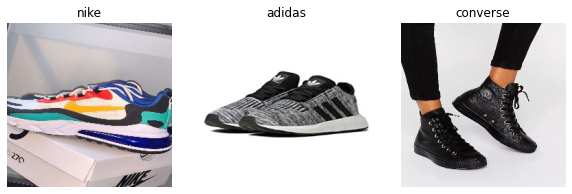

In [10]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
view_random_image(target_dir='data/shoe_classification/train/', target_class='nike');
plt.subplot(1,3,2)
view_random_image(target_dir='data/shoe_classification/train/', target_class='adidas');
plt.subplot(1,3,3)
view_random_image(target_dir='data/shoe_classification/train/', target_class='converse');

In [11]:
train_dir = 'data/shoe_classification/train/'
test_dir = 'data/shoe_classification/test/'

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_image_gen = ImageDataGenerator()

In [14]:
augmented_img_gen = ImageDataGenerator(
rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2)

In [50]:
print("Augmented training data")
train_data_aug = augmented_img_gen.flow_from_directory(directory=train_dir,
                                                       target_size=(240,240),
                                                       batch_size=32,
                                                       class_mode='categorical',
                                                       shuffle=False)

Augmented training data
Found 711 images belonging to 3 classes.


In [49]:
print("Non-augmented training data:")
train_data = train_image_gen.flow_from_directory(train_dir,
                                           target_size=(240,240),
                                           batch_size=32,
                                           class_mode='categorical',
                                           shuffle=False)


Non-augmented training data:
Found 711 images belonging to 3 classes.


In [48]:
print("Non augmented test data:")
test_data = train_image_gen.flow_from_directory(test_dir, target_size=(240,240),
                                         batch_size=32,class_mode='categorical')

Non augmented test data:
Found 114 images belonging to 3 classes.


In [18]:
images , labels = train_data.next()
augmented_images, augmented_labels = train_data_aug.next()
len(images)

16

Showing image number 14:


(-0.5, 239.5, 239.5, -0.5)

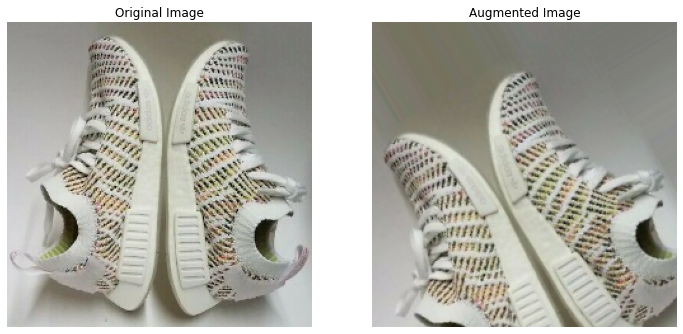

In [19]:
random_number = random.randint(0,15)
print(f"Showing image number {random_number}:")

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(images.astype(np.uint8)[random_number]);
plt.title("Original Image")
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(augmented_images.astype(np.uint8)[random_number]);
plt.title("Augmented Image")
plt.axis(False)

In [47]:
train_data_aug_shuffled = augmented_img_gen.flow_from_directory(train_dir,
                                                               target_size=(240,240),
                                                               batch_size=32,
                                                               class_mode="categorical",
                                                               shuffle=True)

Found 711 images belonging to 3 classes.


In [21]:
shuffled_augmented_images, shuffled_augmented_labels =train_data_aug_shuffled.next()

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.models import Sequential

In [89]:
base_model = tf.keras.applications.VGG16(include_top=False)

base_model.trainable=False

inputs = tf.keras.layers.Input(shape=(240,240,3), name="input_layer")
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="blobal_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")


outputs = tf.keras.layers.Dense(3, activation='softmax', name="output_layer")(x)

model_0 = tf.keras.Model(inputs,outputs)
model_0.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',
               metrics=['accuracy'])

58889256/58889256 [==============================] - 3s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 512)
Shape after GlobalAveragePooling2D: (None, 512)


In [ ]:
model_0.summary()

In [ ]:
history = model_0.fit(train_data_aug_shuffled, epochs=50,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=int(0.25*len(test_data)))

In [30]:
import mplcyberpunk

In [54]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(12,6))
  plt.style.use('cyberpunk')
  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  mplcyberpunk.add_glow_effects()
  #plot accuracy
  plt.figure(figsize=(12,6)) 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()
  mplcyberpunk.add_glow_effects()

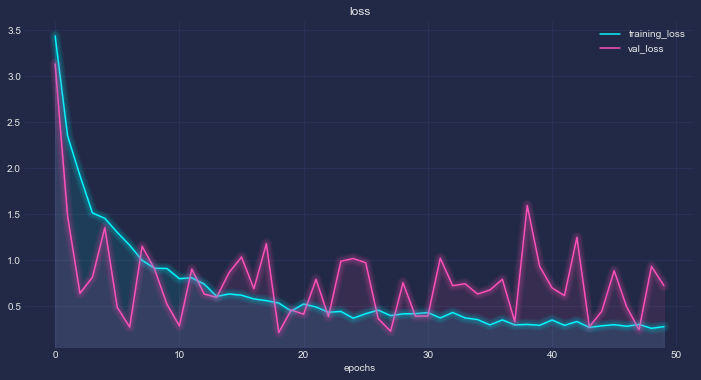

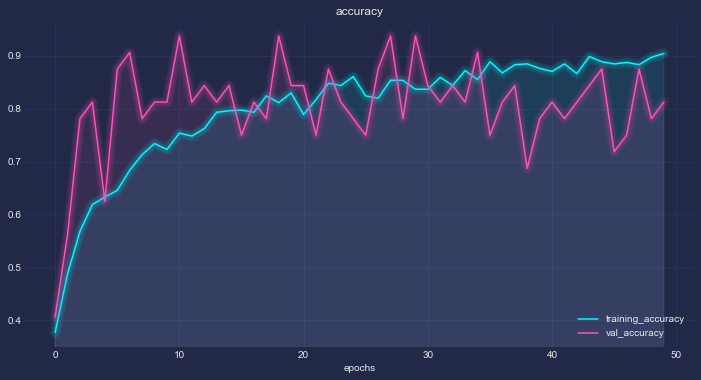

In [92]:
plot_loss_curves(history)

In [82]:
base_model.trainable = True

In [93]:
for layer in base_model.layers[:-10]:
    layer.trainable = False

model_0.compile(loss = 'categorical_crossentropy',
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
initial_epochs = 50
fine_tune_epochs = initial_epochs + 50

# Refit the model
history_2 = model_0.fit(train_data_aug_shuffled,
                                               epochs = fine_tune_epochs,
                                               validation_data = test_data,
                                               validation_steps = int(0.25*len(test_data)),
                                               initial_epoch =  history.epoch[-1])

In [95]:
model_0.evaluate(test_data)

4/4 [==============================] - 3s 935ms/step - loss: 0.6542 - accuracy: 0.8070


[0.6542490720748901, 0.8070175647735596]

In [74]:
def compare_histories(original_history, new_history, initial_epochs = 20):
  """
  Compares two TensorFlow history objects
  """
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new one
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make pllot accuracy
  plt.figure(figsize = (8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label = "Training Accuracy")
  plt.plot(total_val_acc, label = "Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start fine tuning")
  plt.legend(loc = "lower right")
  plt.title("Training and Validation Accuracy")
  mplcyberpunk.add_glow_effects()

  # Make plot loss
  plt.figure(figsize = (8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label = "Training Loss")
  plt.plot(total_val_loss, label = "Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start fine tuning")
  plt.legend(loc = "upper right")
  plt.title("Training and Validation Loss")
  mplcyberpunk.add_glow_effects()

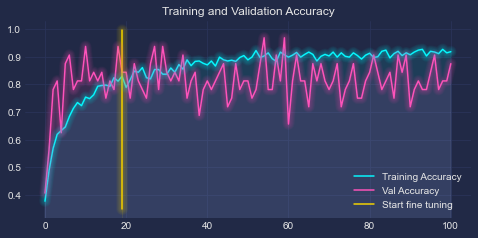

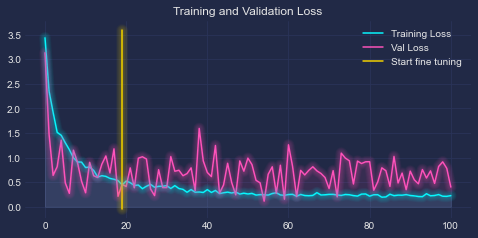

In [96]:
compare_histories(history,history_2)

In [97]:
y_probs = model_0.predict(test_data)
y_probs[:5]

4/4 [==============================] - 1s 298ms/step


array([[3.3238614e-03, 8.3167464e-01, 1.6500147e-01],
       [3.3707893e-03, 5.0615686e-01, 4.9047226e-01],
       [3.4604911e-04, 4.6321288e-01, 5.3644109e-01],
       [4.7192097e-04, 9.9951375e-01, 1.4354250e-05],
       [6.4689487e-01, 2.9631338e-01, 5.6791730e-02]], dtype=float32)

In [98]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([1, 1, 2, 1, 0, 2, 2, 2, 2, 0], dtype=int64)

In [99]:
model_0.save("vgg16_shoe_predicter.h5")

In [107]:
test_images, test_labels = test_data.next()

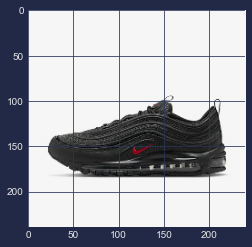

In [114]:
plt.imshow(test_images.astype(np.uint8)[3])

In [112]:
class_names

array(['adidas', 'converse', 'nike'], dtype='<U8')

In [4]:
from tensorflow import keras
from keras.models import load_model

In [5]:
model = load_model("model_saves\\vgg16_shoe_predictor.h5")

In [6]:
model.load_weights("model_saves\\vgg16_shoe_predictor.h5")

In [8]:
from PIL import Image

In [18]:
nike_shoe = mimage.imread("nike_shoe.jpg")

In [21]:
nike_shoe.shape

(240, 240, 3)

In [20]:
model.predict(nike_shoe)

ValueError: in user code:

    File "d:\Anaconda\envs\ML\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "d:\Anaconda\envs\ML\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Anaconda\envs\ML\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "d:\Anaconda\envs\ML\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "d:\Anaconda\envs\ML\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\Anaconda\envs\ML\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_4" is incompatible with the layer: expected shape=(None, 240, 240, 3), found shape=(None, 240, 3)
